In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import seaborn as sns

In [18]:
df=pd.read_csv("Accident_Information.csv")

C:\Users\Acer\AppData\Local\Temp\ipykernel_18176\1706784239.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Accident_Information.csv")


In [3]:
df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

Filtering only the required columns

In [19]:
del_col=[ 'Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number','Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail','Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'LSOA_of_Accident_Location','Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions','Special_Conditions_at_Site','Urban_or_Rural_Area','InScotland',"Carriageway_Hazards","Year"]
df.drop(del_col,axis=1,inplace=True)

In [20]:
df["Date"]=pd.to_datetime(df["Date"])

In [21]:
df=df[df["Date"]>='2017-01-01']

In [22]:
df.reset_index(drop=True,inplace=True)

In [23]:
df["Month"]=df["Date"].dt.month

In [9]:
df.head()

,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Road_Type,Speed_limit,Time,Weather_Conditions,Month
0,Fatal,2017-08-05,Saturday,Darkness - lights lit,3,Single carriageway,30.0,03:12,Fine no high winds,8
1,Slight,2017-01-01,Sunday,Darkness - lights lit,1,Single carriageway,30.0,01:30,Fine no high winds,1
2,Slight,2017-01-01,Sunday,Darkness - lights lit,1,Single carriageway,30.0,00:30,Fine no high winds,1
3,Slight,2017-01-01,Sunday,Darkness - lights lit,1,Roundabout,30.0,01:11,Raining no high winds,1
4,Serious,2017-01-01,Sunday,Darkness - lights lit,1,Dual carriageway,20.0,01:42,Fine no high winds,1


<Axes: xlabel='Accident_Severity', ylabel='count'>

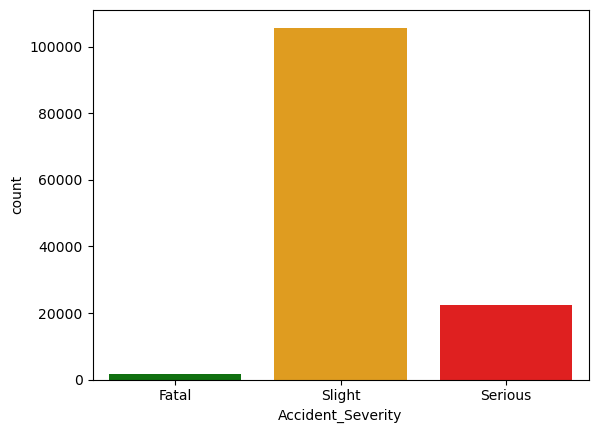

In [10]:
sns.countplot(data=df,x="Accident_Severity",palette=["green","orange","red"])

<Axes: xlabel='Longitude', ylabel='Latitude'>

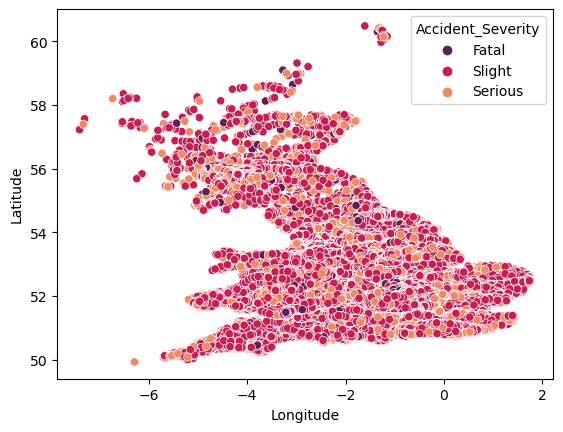

In [39]:
sns.scatterplot(y="Latitude",x="Longitude",hue="Accident_Severity",palette="rocket",data=df)

### Most of the accidents in UK are tagged as Slight

<Axes: xlabel='Month', ylabel='count'>

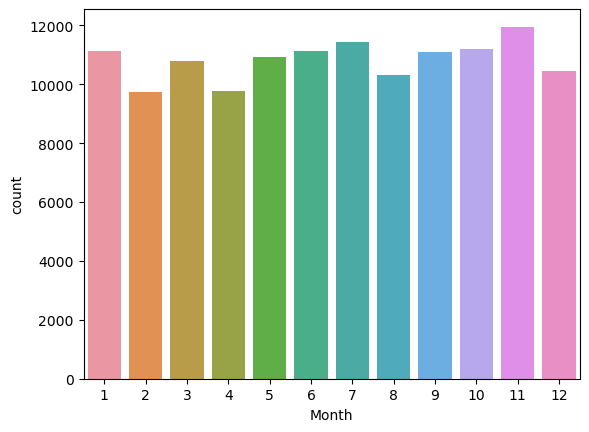

In [11]:
sns.countplot(data=df,x="Month")

### Most of the accidents happen in the month of November

<Axes: xlabel='Day_of_Week', ylabel='count'>

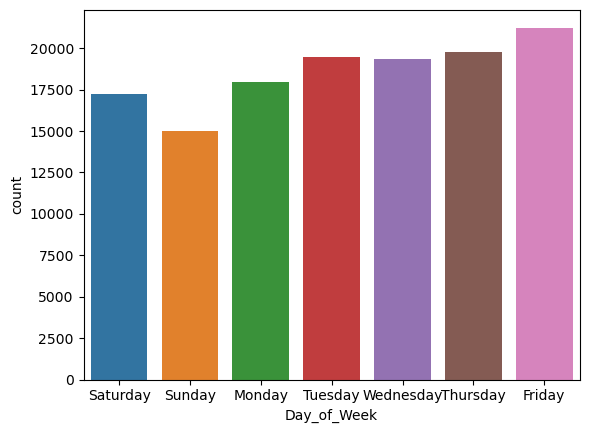

In [12]:
sns.countplot(data=df,x="Day_of_Week")

C:\Users\Acer\AppData\Local\Temp\ipykernel_18176\1495765094.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sns.countplot(x=pd.to_datetime(df['Time']).dt.hour)


<Axes: xlabel='Time', ylabel='count'>

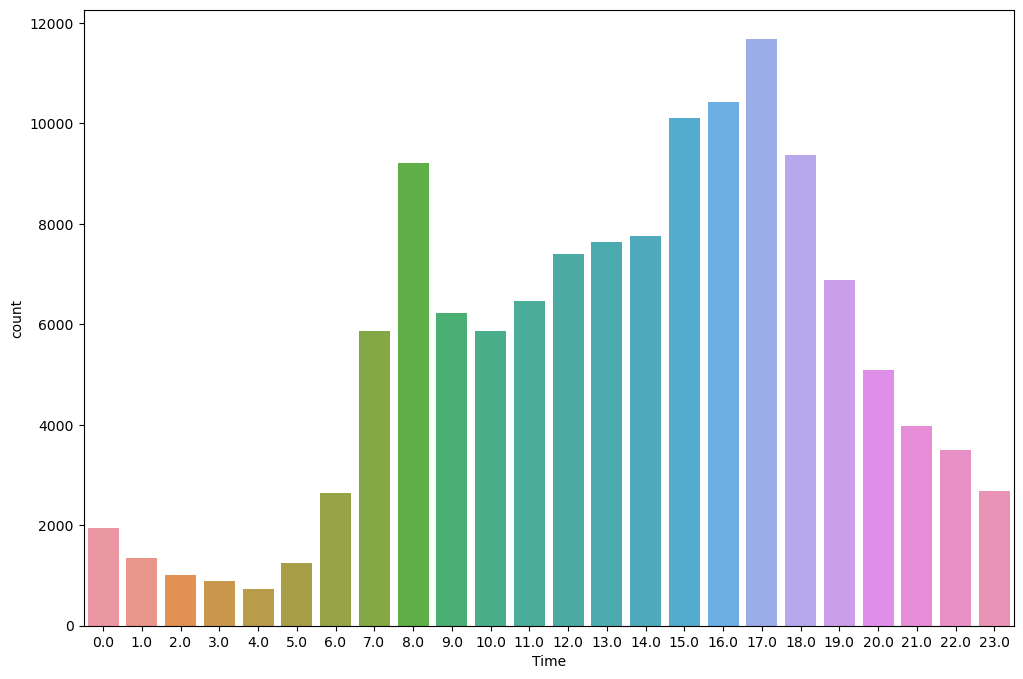

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x=pd.to_datetime(df['Time']).dt.hour)


<Axes: xlabel='Speed_limit', ylabel='count'>

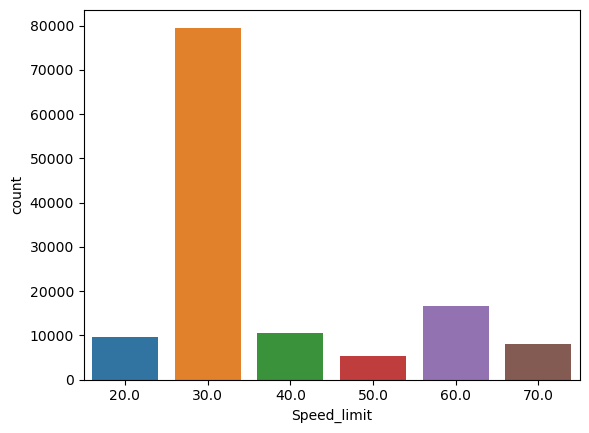

In [13]:
sns.countplot(data=df,x="Speed_limit")

### Accidents occur frequently where the speed limit of the road was 30kmph

In [24]:
def other_con(weather):
    if (weather in ['Unknown','Data missing or out of range'] ):
        return "Other"
    else: return weather
df["Weather_Conditions"]=df["Weather_Conditions"].apply(other_con)        

<Axes: xlabel='Accident_Severity', ylabel='count'>

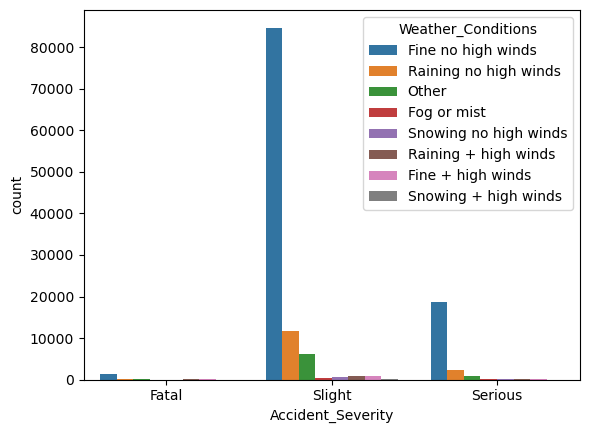

In [15]:
sns.countplot(data=df,x="Accident_Severity",hue="Weather_Conditions")

### From the graph it seems that bad weather is not a great affecting factor for accidents

Categorizing 

In [25]:
def others(light):
    if(light in ['Darkness - lighting unknown', 'Darkness - lights unlit',
       'Data missing or out of range'] ):
        return "Other"
    else: return light
    
df['Light_Conditions']=df["Light_Conditions"].apply(others)

<Axes: xlabel='Light_Conditions', ylabel='Number_of_Casualties'>

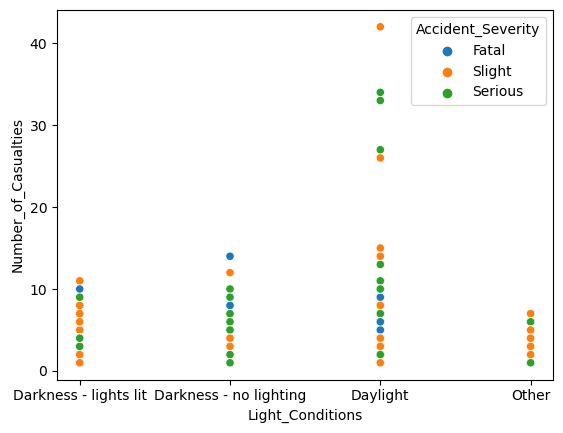

In [17]:
sns.scatterplot(y="Number_of_Casualties",x="Light_Conditions",hue="Accident_Severity",data=df)